# MUSHROOMS

## Binary Classification

### Imports

In [1]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [2]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [6]:
# categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


### Split Datset

#### Get the Labels

In [7]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [8]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

85% - X_train size: 6905  y_train size: 6905
15% - X_test size:  1219  y_test size:  1219


#### Validation Set

In [9]:
X_valid, X_train = X_train_full[:500], X_train_full[500:]
y_valid, y_train = y_train_full[:500], y_train_full[500:]

print("X_train:", X_train.shape[0], "y_train", y_train.shape[0])
print("X_valid: ", X_valid.shape[0], "y_valid ", y_valid.shape[0])

X_train: 6405 y_train 6405
X_valid:  500 y_valid  500


### Prepare the Data

#### Data Transformation

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.fit_transform(X_valid)
X_test  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [12]:
tf.random.set_seed(42)

In [13]:
model = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                1035      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 46        
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [17]:
train_model = model.fit(X_train, y_train,
                          epochs=100,
                          validation_data=(X_valid, y_valid),
                          callbacks=[checkpoint_cb,
                                     early_stopping_cb])

Train on 6405 samples, validate on 500 samples
Epoch 1/100
6405/6405 [==============================] - 1s 119us/sample - loss: 0.4699 - accuracy: 0.8006 - val_loss: 0.3927 - val_accuracy: 0.8380
Epoch 2/100
6405/6405 [==============================] - 0s 62us/sample - loss: 0.3372 - accuracy: 0.8792 - val_loss: 0.3539 - val_accuracy: 0.8560
Epoch 3/100
6405/6405 [==============================] - 0s 61us/sample - loss: 0.2872 - accuracy: 0.8985 - val_loss: 0.2778 - val_accuracy: 0.8980
Epoch 4/100
6405/6405 [==============================] - 0s 66us/sample - loss: 0.2514 - accuracy: 0.9105 - val_loss: 0.2519 - val_accuracy: 0.9100
Epoch 5/100
6405/6405 [==============================] - 0s 59us/sample - loss: 0.2250 - accuracy: 0.9213 - val_loss: 0.2476 - val_accuracy: 0.9040
Epoch 6/100
6405/6405 [==============================] - 0s 64us/sample - loss: 0.2034 - accuracy: 0.9286 - val_loss: 0.2080 - val_accuracy: 0.9140
Epoch 7/100
6405/6405 [==============================] - 0s 62us

#### Learning Curves

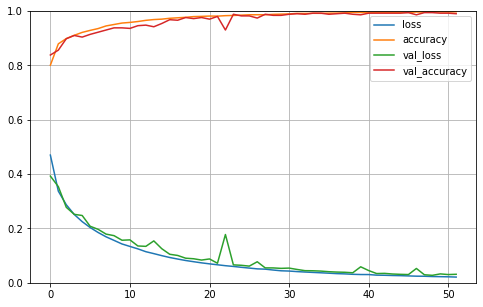

In [18]:
pd.DataFrame(train_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Evaluate the Best Model on Test Set

In [19]:
model.evaluate(X_test, y_test)

1219/1219 [==============================] - 0s 38us/sample - loss: 0.0276 - accuracy: 0.9967


[0.027585508578424085, 0.99671865]

#### Confusion Matrix

In [20]:
import seaborn as sns

#Parameters
title = 'Confusion Matrix'
custom_color = '#ffa600'   

#Function for drawing confusion matrix
def draw_confusion_matrix(cm, title = title, color = custom_color):
    palette = sns.light_palette(color, as_cmap=True)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap=palette)
    # Title
    ax.set_title('\n' + title + '\n',
                 fontweight='bold',
                 fontstyle='normal', 
                )
    # x y labels 
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold');
    # Classes names
    x_names = ['Poisonous', 'Edible']
    y_names = ['Poisonous', 'Edible']
    ax.xaxis.set_ticklabels(x_names, ha = 'center')
    ax.yaxis.set_ticklabels(y_names, va = 'center')

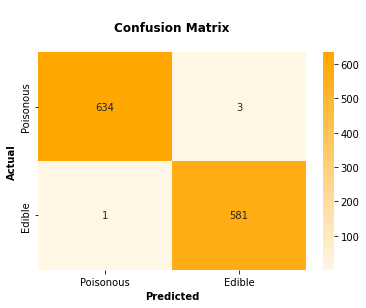

In [21]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_test_pred)

draw_confusion_matrix(cm)

#### ROC Curve

In [22]:
#Function for plotting the ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, custom_color, label='Area: %0.3f' %roc_auc, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate - Recall')
    plt.legend(loc='lower right')
    plt.show()

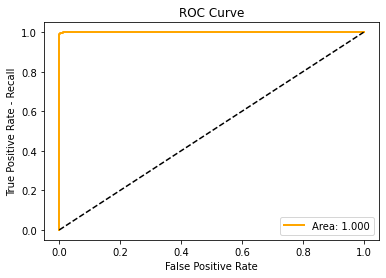

In [23]:
from sklearn.metrics import roc_curve, auc

y_test_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, roc_auc)

### Make Some Predictions

In [24]:
X_new = X_test[:5]
y_prob = model.predict(X_new)
print(y_prob.round(3))

[[0.001]
 [0.998]
 [1.   ]
 [0.056]
 [0.999]]


In [25]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[[0]
 [1]
 [1]
 [0]
 [1]]
